In [1]:
#Routine Stuff
import numpy as np
import pandas as pd
from string import punctuation
import os
import operator
import matplotlib.pyplot as plt

In [3]:
#List of stop_words
f = open("StopWords.txt","r")
stop_words = []
for word in f.read().split():
    stop_words.append(word)
stop_words

["'ll",
 "'ve",
 '1-1',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'abroad',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ago',
 'ah',
 'ahead',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amid',
 'amidst',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'are',
 'area',
 'areas',
 'aren',
 "aren't",
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asked',
 'asking',
 'asks',
 'associated',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'backward',
 'bac

In [2]:
#stop_words = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

#other words to ignore
ignore_words = ["xyz", " ", "subject", "lines", "newsgroups", "path", "message-id", "organization"]

In [4]:
dic = {}
tempPath = "/Users/jo/Documents/CN_ML/Text Classification - Project/20_newsgroups"
os.chdir(tempPath) #change path to tempPath
countDir = 0
totalDir = len(os.listdir(os.getcwd()))
for directory in os.listdir(os.getcwd()): #iterate through each class directory
    if directory[0]=='.': #ignoring the directory with a '.' at their beginning (mac issues I guess)
        continue
    path = tempPath + "/" + directory
    os.chdir(path) #change path to the next (or new) class directory
    files = os.listdir(os.getcwd()) #list of files in directory

    n = len(files)
    t = int(n*0.8) #number of training documents
    files = files[:t]
    
    count = 0
    print(t, "files to process in", directory)

    for file in files: #iterate through each file in the class directory
        f = open(file,"r",errors="ignore")
        for word in f.read().split():
            word = word.strip(punctuation).lower()
            if word not in stop_words and word not in ignore_words:# and word.isalpha() and len(word)!=1:
                #add/update frequency of each word that is not part of stop_words or ignore_words to the dictionary
                if word in dic:
                    dic[word] = dic[word] + 1
                else:
                    dic[word] = 1
        count += 1
        if count%100 == 0:
            print("Done with files: ", count)
    countDir += 1
    print("Done with directory: ", directory)
    print("Number: ", countDir, "of", totalDir)
    print()

800 files to process in talk.politics.mideast
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with directory:  talk.politics.mideast
Number:  1 of 21

800 files to process in rec.autos
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with directory:  rec.autos
Number:  2 of 21

800 files to process in comp.sys.mac.hardware
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with directory:  comp.sys.mac.hardware
Number:  3 of 21

800 files to process in alt.atheism
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done

In [5]:
dicbak = dic

In [6]:
dic = dicbak

In [7]:
len(dic)

236229

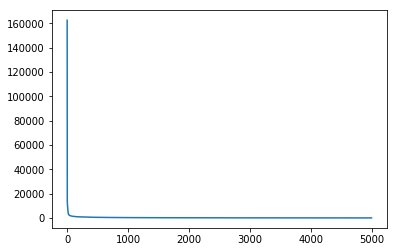

In [16]:
K = 5000 #limit the vocab list
#sort the dict according to frequency
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
sorted_dic = sorted_dic[:K]
sorted_dic_name = [elem[0] for elem in sorted_dic]
sorted_dic_freq = [elem[1] for elem in sorted_dic]
sorted_dic = [list(elem) for elem in sorted_dic]
plt.plot(sorted_dic_freq)
plt.show()

In [9]:
sorted_dic

[['', 162607],
 ['apr', 15726],
 ['gmt', 14204],
 ['1993', 11926],
 ['writes', 11658],
 ['references', 10316],
 ['article', 10053],
 ['sender', 8809],
 ['people', 8075],
 ['university', 7986],
 ['1', 7447],
 ['nntp-posting-host', 6856],
 ['93', 6690],
 ['2', 5958],
 ['xref', 4849],
 ['cantaloupe.srv.cs.cmu.edu', 4840],
 ['news', 3959],
 ['distribution', 3824],
 ['3', 3623],
 ['god', 3589],
 ['0', 3571],
 ["max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax", 3307],
 ['20', 3004],
 ['5', 2942],
 ['6', 2894],
 ['4', 2866],
 ['16', 2832],
 ['15', 2605],
 ['government', 2597],
 ['21', 2588],
 ['question', 2567],
 ['reply-to', 2447],
 ['read', 2425],
 ['usenet', 2347],
 ['usa', 2346],
 ['windows', 2301],
 ['david', 2178],
 ['software', 2147],
 ['data', 2144],
 ['program', 2121],
 ['file', 2115],
 ['23', 2114],
 ['10', 2055],
 ['space', 2047],
 ['version', 2018],
 ['science', 1983],
 ['power', 1974],
 ['john', 1954],
 ['drive', 1916],
 ['22', 1896],
 ['fri', 1883],
 ['day', 1868],
 

In [10]:
data = np.array([np.array(xi) for xi in sorted_dic])
data

array([['', '162607'],
       ['apr', '15726'],
       ['gmt', '14204'],
       ..., 
       ['mlb', '63'],
       ['orioles', '63'],
       ['tampa', '63']],
      dtype='<U86')

In [13]:
df = pd.DataFrame(data[1:])
df

,0,1
0,apr,15726
1,gmt,14204
2,1993,11926
3,writes,11658
4,references,10316
5,article,10053
6,sender,8809
7,people,8075
8,university,7986
9,1,7447


In [14]:
#save vocab to a file
os.chdir("/Users/jo/Documents/CN_ML/Text Classification - Project")
df.to_csv("vocab.csv")